# Week 3

## Part 1: Small world networks

**What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?**
<br>
The problem is that random networks underestimates the size and the frequency of the higher nodes as well as for lower nodes. Random networks assumes that as the dregree of the network increases, so the number of nodes, but in real-world networks the graph only becomes more interconnected and therefore are less disparse.

**List the four regimes that characterize random networks as a function of $\langle k \rangle$.**
<br>
- Subcritical regime: $0 < <k> < 1$
- Critical point: $<k> = 1$
- Supercritical regime: $<k> > 1$
- Connected regime: $<k> = lnN$

**According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?**
<br>
Random network model does not capture the clustering of real networks. Instead real networks have a much higher clustering coefficient than expected for a random network of similar N and L. An extension of the random network model proposed by Watts and Strogatz [29] addresses the coexistence of high ‹C› and the small world property (BOX 3.9). It fails to explain, however, why high-degree nodes have a smaller clustering coefficient than low-degree nodes. Models explaining the shape of C(k) are discussed in Chapter 9.

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

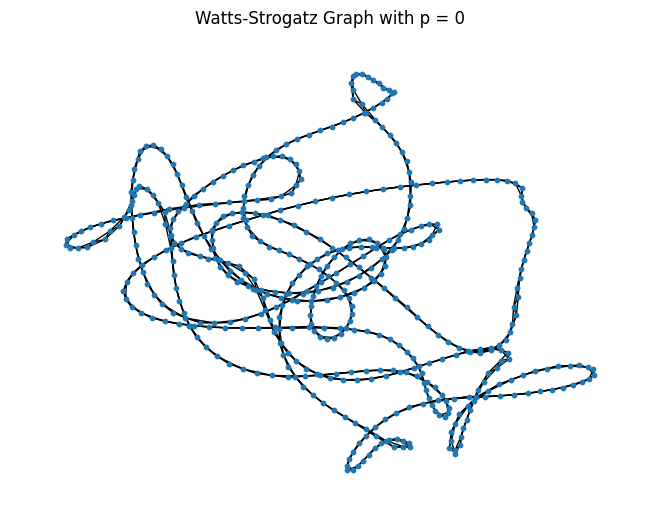

Average clustering coefficient for p = 0: 0.5
Average shortest path length for p = 0: 62.875751503006015


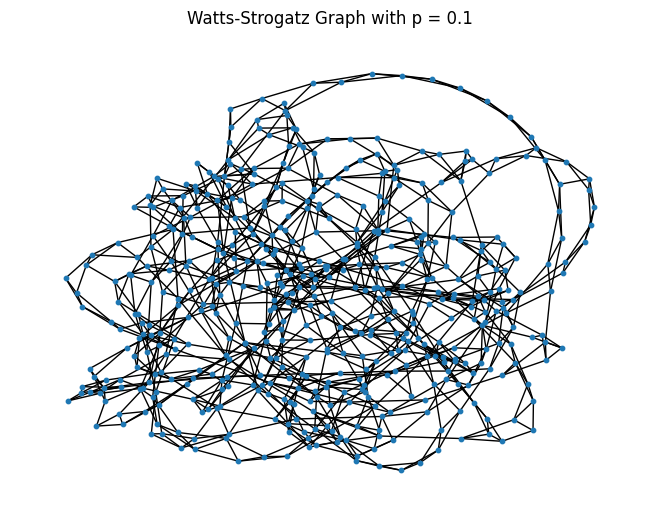

Average clustering coefficient for p = 0.1: 0.3668
Average shortest path length for p = 0.1: 7.905603206412826


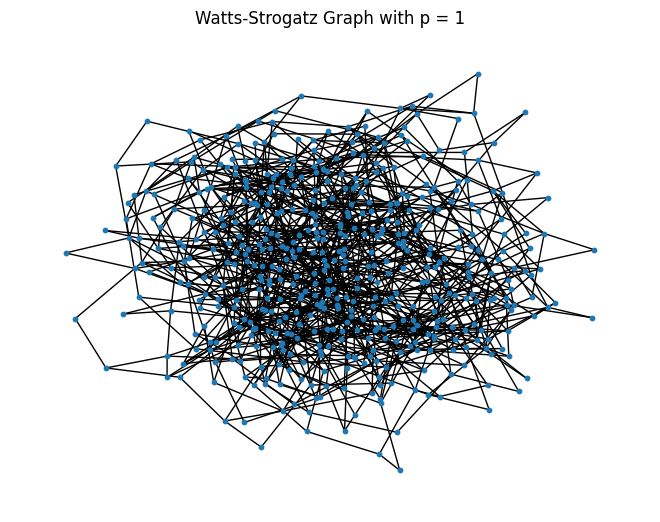

Average clustering coefficient for p = 1: 0.0047936507936507935
Average shortest path length for p = 1: 4.74896993987976


In [3]:
# Defining graphs
N = 500
k = 4
p = [0, 0.1, 1]

# Generate a graph for each p value with watts_strogatz_graph
for i in range(3):
    G = nx.watts_strogatz_graph(N, k, p[i])
    # Plot the graph
    plt.figure()
    nx.draw(G, node_size=10)
    plt.title('Watts-Strogatz Graph with p = ' + str(p[i]))
    plt.show()
    # Print the average clustering coefficient
    print('Average clustering coefficient for p = ' + str(p[i]) + ': ' + str(nx.average_clustering(G)))
    # Print the average shortest path length
    print('Average shortest path length for p = ' + str(p[i]) + ': ' + str(nx.average_shortest_path_length(G)))

When p = 1 the network starts being more connected, therefore the average shortest path is smaller for this value, having a network similar to a giant component.

In [4]:
N = 500
k = 4
p = np.arange(0, 1.1, 0.1)

# Generate a graph for each p value with watts_strogatz_graph
for i in range(11):
    G = nx.watts_strogatz_graph(N, k, p[i])
    # Print the average shortest path length
    print('Average shortest path length for p = ' + str(p[i]) + ': ' + str(nx.average_shortest_path_length(G)))

    # DOES NOT WORK
    # Fully randomized network
    # R = nx.erdos_renyi_graph(N, p[i])
    # # 2. Randomly select two nodes
    # node1 = random.choice(list(R.nodes))
    # node2 = random.choice(list(R.nodes))

    # # Ensure the nodes are different and a path exists between them
    # while node1 == node2 or not nx.has_path(R, node1, node2):
    #     node2 = random.choice(list(G.nodes))

    # # 3. Find the shortest path between the two nodes
    # shortest_path = nx.shortest_path_length(G, source=node1, target=node2)
    # # Print the shortest path length
    # print('Shortest path length for p = ' + str(p[i]) + ' (randomized): ' + str(shortest_path))

Average shortest path length for p = 0.0: 62.875751503006015
Average shortest path length for p = 0.1: 8.083967935871744
Average shortest path length for p = 0.2: 5.901755511022044
Average shortest path length for p = 0.30000000000000004: 5.56188376753507
Average shortest path length for p = 0.4: 5.200224448897796
Average shortest path length for p = 0.5: 4.97223246492986
Average shortest path length for p = 0.6000000000000001: 4.835086172344689
Average shortest path length for p = 0.7000000000000001: 4.779815631262525
Average shortest path length for p = 0.8: 4.761651302605211
Average shortest path length for p = 0.9: 4.757643286573146
Average shortest path length for p = 1.0: 4.7651062124248496


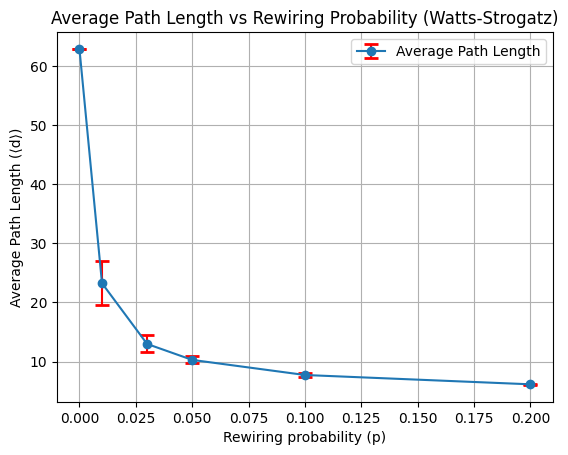

In [5]:
N = 500
k = 4
p = [0, 0.01, 0.03, 0.05, 0.1, 0.2]

# Initialize lists to store results
avg_distances = []
std_distances = []

for pi in p:
    distances = []

    for i in range(50):
        # Generate a Watts-Strogatz small-world network
        G = nx.watts_strogatz_graph(N, k, pi)
        
        # Ensure the graph is connected
        if nx.is_connected(G):
            # Calculate the average path length
            avg_distance = nx.average_shortest_path_length(G)
            distances.append(avg_distance)
    
    # Calculate the mean and standard deviation of the path lengths for this p
    avg_distances.append(np.mean(distances))
    std_distances.append(np.std(distances))

# 4. Plotting with error bars
plt.errorbar(p, avg_distances, yerr=std_distances, fmt='-o', capsize=5, capthick=2, ecolor='red', label='Average Path Length')

plt.xlabel('Rewiring probability (p)')
plt.ylabel('Average Path Length (⟨d⟩)')
plt.title('Average Path Length vs Rewiring Probability (Watts-Strogatz)')
plt.grid(True)
plt.legend()
plt.show()

## Part 2: Scale-free networks

*A scale-free network is a network whose degree distribution follows a power law.*
<br>

**What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).**
<br>
- **Anomalous regime**: γ <= 2, no large networks can exist here. The number of links connected to the largest hub grows faster than the size of the network.
- **Scale-free regime**: 2 < γ < 3,  first moment of the degree distribution is finite but the second and higher moments diverge, therefore networks in this regime are ultra-small.
- **Random regime**: γ > 3, the first and the second moments are finite. For all practical purposes the properties of a scale-free network in this regime are difficult to distinguish from the properties a random network of similar size.


**What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.**
<br>
- **Sublinear Preferential Attachment** (0 < α < 1): The degree distribution follows the stretched exponential, resulting in fewer and smaller hubs than in a scale-free network. As α → 1 the cutoff length increases and pk follows a power law over an increasing range of degrees.
- **Linear Regime** (α=1): This corresponds to the Barabási-Albert model, hence the degree distribution follows a power law.
- **Superlinear Preferential Attachment** (α > 1): The high-degree nodes are disproportionately attractive. A winner-takes-all dynamics leads to a hub-and-spoke topology. In this configuration the earliest nodes become super hubs and all subsequent nodes link to them. 

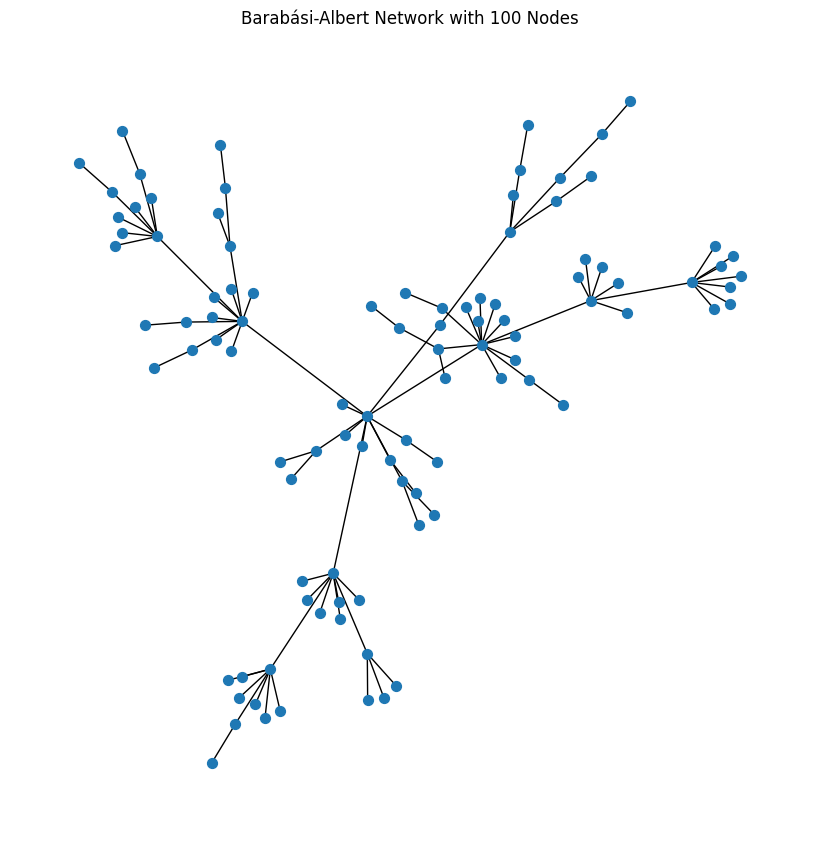

Maximum degree: 74
Minimum degree: 1


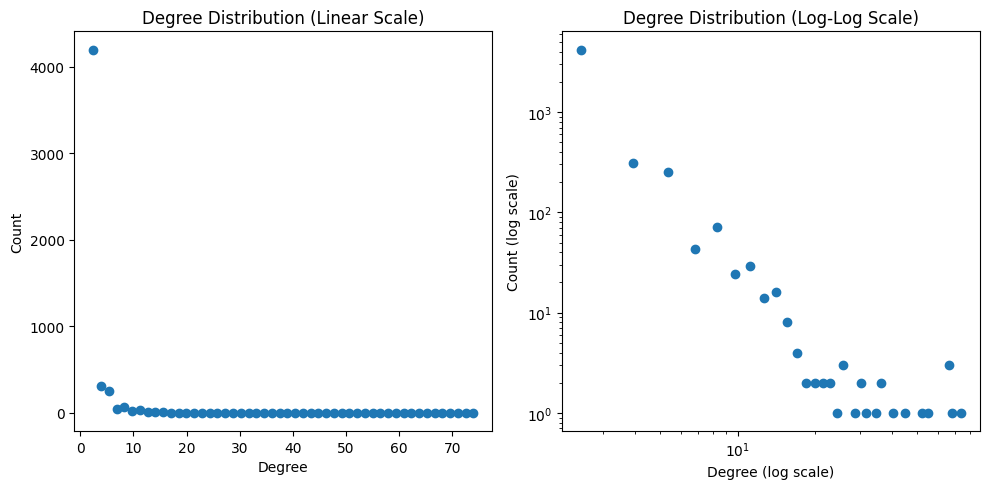

In [6]:
# Create a graph
BA = nx.Graph()

# Create a single link
BA.add_edge(0, 1)

# Function to add a node with preferential attachment
def add_node_with_preferential_attachment(G):
    # Create a list of nodes where nodes appear proportional to their degree
    nodes = list(G.nodes)
    node_list = []
    for node in nodes:
        # Append each node by the number of times equal to its degree
        node_list.extend([node] * G.degree[node])

    # Randomly choose a node to connect to from this list (preferential attachment)
    new_node = len(G.nodes)
    connected_node = random.choice(node_list)
    G.add_edge(new_node, connected_node)

# Add 100 nodes with preferential attachment
while len(BA.nodes) < 100:
    add_node_with_preferential_attachment(BA)

# Plot the network after 100 nodes
plt.figure(figsize=(8, 8))
nx.draw(BA, node_size=50, with_labels=False)
plt.title("Barabási-Albert Network with 100 Nodes")
plt.show()

# Add till 5000 nodes
while len(BA.nodes) < 5000:
    add_node_with_preferential_attachment(BA)

# Find the maximum and minimum degree
degrees = dict(BA.degree()).values()
max_degree = max(degrees)
min_degree = min(degrees)
print(f"Maximum degree: {max_degree}")
print(f"Minimum degree: {min_degree}")

# Bin the degree distribution using numpy.histogram
degree_sequence = sorted([d for n, d in BA.degree()], reverse=True)  # degree sequence
hist, bin_edges = np.histogram(degree_sequence, bins=50)

# Plot the degree distribution
plt.figure(figsize=(10, 5))

# Linear scale plot
plt.subplot(1, 2, 1)
plt.scatter(bin_edges[1:], hist, marker='o', linestyle='None')
plt.xlabel("Degree")
plt.ylabel("Count")
plt.title("Degree Distribution (Linear Scale)")

# Log-log scale plot
plt.subplot(1, 2, 2)
plt.loglog(bin_edges[1:], hist, marker='o', linestyle='None')
plt.xlabel("Degree (log scale)")
plt.ylabel("Count (log scale)")
plt.title("Degree Distribution (Log-Log Scale)")

plt.tight_layout()
plt.show()

In [7]:
count = 0
for j in range(1000):
    # Get a random node from BA
    i = random.choice(list(BA.nodes))

    # Get the node degree
    degree = BA.degree[i]

    # Get the neighbors of the node
    neighbors = list(BA.neighbors(i))

    # Calculate average degree of the neighbors
    avg_degree = np.mean([BA.degree[n] for n in neighbors])

    # Print the results
    # print(f"Node {i} has degree {degree}")
    # print(f"Node {i} has neighbors {neighbors}")
    # print(f"Node {i} has neighbors with average degree {avg_degree}")

    if degree < avg_degree:
        count += 1

# Print F-BA paradox count
print(f"Number of times the F-BA paradox occurs: {count}")

Number of times the F-BA paradox occurs: 862


### Friendship paradox B

*What if the power law is flatter, e.g. $p(k) \sim k^{-\gamma}$ with $\gamma = 2$? Will the fraction of times the paradox is true be higher or lower?*
<br>
<br>
**First answer this question by simply reasoning. Think about what it would mean in terms of hubs that the power law is flatter?**
<br>
When 𝛾 = 2, the power-law distribution is flatter, which means the friendship paradox will be more prevalent because high-degree nodes (hubs) are more common and more likely to be selected as friends. Conversely, as γ increases, the paradox becomes less prevalent because the distribution favors low-degree nodes.


In [8]:
# Parameters for power-law distribution
alpha = 2  # Power-law exponent
x_min = 1   # Minimum degree
num_nodes = 5000  # Number of nodes

# Generate a power-law degree sequence
def generate_power_law_sequence(alpha, x_min, size):
    # Generate uniformly distributed random numbers
    r = np.random.uniform(0, 1, size)
    # Transform to get power-law distributed degrees
    degrees = x_min * (1 - r) ** (-1 / (alpha - 1))
    # Round to integers
    degrees = np.round(degrees).astype(int)
    return degrees

# Generate degree sequence
degree_sequence = generate_power_law_sequence(alpha, x_min, num_nodes)

# Ensure the sum of the degree sequence is even
if np.sum(degree_sequence) % 2 != 0:
    # If sum is odd, add 1 to a random degree to make it even
    degree_sequence[np.random.randint(0, num_nodes)] += 1

# Create the network using the configuration model
BAF = nx.configuration_model(degree_sequence)

# Remove self-loops and parallel edges
BAF = nx.Graph(BAF)  # Convert to simple graph
BAF.remove_edges_from(nx.selfloop_edges(BAF))


In [9]:
count = 0
for j in range(1000):
    # Get a random node from BA
    i = random.choice(list(BAF.nodes))

    # Get the node degree
    degree = BAF.degree[i]

    # Get the neighbors of the node
    neighbors = list(BAF.neighbors(i))

    # Calculate average degree of the neighbors
    avg_degree = np.mean([BAF.degree[n] for n in neighbors])

    # Print the results
    # print(f"Node {i} has degree {degree}")
    # print(f"Node {i} has neighbors {neighbors}")
    # print(f"Node {i} has neighbors with average degree {avg_degree}")

    if degree < avg_degree:
        count += 1

# Print F-BA paradox count
print(f"Number of times the F-BA flatter paradox occurs: {count}")

Number of times the F-BA flatter paradox occurs: 981


**Did you reason correctly above? For what fraction of the time is the friendship paradox true for your network with a new slope?**
<br>
Yes before the paradox occurs aroun 86% of the times and now the value is up to 97%.

In [10]:
# Doing the F-CM friendship configuration model
# Degree sequence of the BA network
degree_sequence = [d for n, d in BA.degree()]

# Generate the configuration model based on the degree sequence
FCM = nx.configuration_model(degree_sequence)
FCM = nx.Graph(FCM)  # Convert to simple graph (removes parallel edges and self-loops)

count = 0
for j in range(1000):
    # Get a random node from BA
    i = random.choice(list(FCM.nodes))

    # Get the node degree
    degree = FCM.degree[i]

    # Get the neighbors of the node
    neighbors = list(FCM.neighbors(i))

    # Calculate average degree of the neighbors
    avg_degree = np.mean([FCM.degree[n] for n in neighbors])

    if degree < avg_degree:
        count += 1

# Print F-CM paradox count
print(f"Number of times the F-CM paradox occurs: {count}")

Number of times the F-CM paradox occurs: 647


## Factors beyond the degree-distribution

While degree distribution is crucial in determining how frequently the friendship paradox holds, several other network properties can influence the outcome. Below are key factors:

* **Assortativity (Degree Correlation)**

**Definition**: Assortativity is a measure of how nodes with similar degrees tend to connect. In assortative networks, high-degree nodes are more likely to connect to other high-degree nodes, whereas in disassortative networks, high-degree nodes connect more frequently to low-degree nodes.

**Impact on Friendship Paradox**: The friendship paradox is more likely to occur in disassortative networks because high-degree nodes tend to have low-degree neighbors, causing most nodes to see higher average neighbor degrees. In assortative networks, nodes of similar degrees cluster, reducing the likelihood of the paradox. Therefore, F-BA and F-CM might differ in assortativity, potentially affecting how often the paradox holds.

* **Clustering Coefficient (Triadic Closure)**

**Definition**: The clustering coefficient measures the degree to which nodes in a network tend to form closed triplets or triangles (i.e., if two neighbors of a node are also neighbors of each other).

**Impact on Friendship Paradox**: Networks with high clustering tend to have tightly-knit communities where node degrees are more similar, reducing the friendship paradox's effect. Barabási-Albert (BA) networks typically exhibit low clustering because of their tree-like, hub-and-spoke structure, while configuration models can exhibit more diverse clustering patterns. If F-BA and F-CM differ significantly in clustering, it could lead to variations in how frequently the paradox is observed.

* **Community Structure**

**Definition**: Community structure refers to how nodes are grouped into distinct clusters or subgroups, with more connections within groups than between them.

**Impact on Friendship Paradox:** Networks with pronounced community structures can have localized effects on degree distribution and neighbor degrees. In a network where community structure is strong, nodes in the same community may have more similar degrees, thereby reducing the friendship paradox's occurrence within that community. Since the Barabási-Albert model tends to create more global hubs without strong community structure, while the configuration model could potentially generate more localized communities depending on its rewiring, F-BA and F-CM may differ in this respect.

* **Path Length and Network Diameter**

**Definition**: Path length is the average number of steps along the shortest paths for all possible pairs of nodes. The diameter is the longest shortest path between any two nodes.

**Impact on Friendship Paradox**: Networks with shorter path lengths may lead to more connectedness and faster dissemination of connections, influencing how nodes are connected across degrees. While BA networks tend to have a small-world nature (short path lengths), configuration models with the same degree distribution may or may not exhibit this characteristic, depending on their structure. This could indirectly influence the friendship paradox as well.

In [12]:
# Function to compute the paradox fraction with bootstrapping
def bootstrap_paradox_fraction(G, num_samples=1000):
    paradox_fractions = []
    for _ in range(num_samples):
        sample_nodes = np.random.choice(list(G.nodes), size=G.number_of_nodes(), replace=True)
        paradox_count = 0
        for node in sample_nodes:
            degree = G.degree[node]
            neighbors_degrees = [G.degree[n] for n in G.neighbors(node)]
            if neighbors_degrees:
                avg_neighbor_degree = np.mean(neighbors_degrees)
                if avg_neighbor_degree > degree:
                    paradox_count += 1
        paradox_fractions.append(paradox_count / len(sample_nodes))
    return np.mean(paradox_fractions), np.std(paradox_fractions)

# Example for F-BA and F-CM
mean_fba, std_fba = bootstrap_paradox_fraction(BA)
mean_fcm, std_fcm = bootstrap_paradox_fraction(FCM)

print(f"F-BA Paradox Fraction: {mean_fba:.4f} ± {std_fba:.4f}")
print(f"F-CM Paradox Fraction: {mean_fcm:.4f} ± {std_fcm:.4f}")

# TAKES TOO LONG TO RUN IDK IF IT WORKS
# # Plotting with error bars
# fractions_FBA = [bootstrap_paradox_fraction(BA)[0] for _ in range(100)]
# fractions_FCM = [bootstrap_paradox_fraction(FCM)[0] for _ in range(100)]

# plt.errorbar(x=['F-BA', 'F-CM'], y=[np.mean(fractions_FBA), np.mean(fractions_FCM)], 
#              yerr=[np.std(fractions_FBA), np.std(fractions_FCM)], fmt='o', capsize=5)
# plt.ylabel("Fraction of Nodes with Friendship Paradox")
# plt.title("Friendship Paradox Comparison in F-BA and F-CM")
# plt.show()

F-BA Paradox Fraction: 0.8612 ± 0.0049
F-CM Paradox Fraction: 0.6417 ± 0.0069


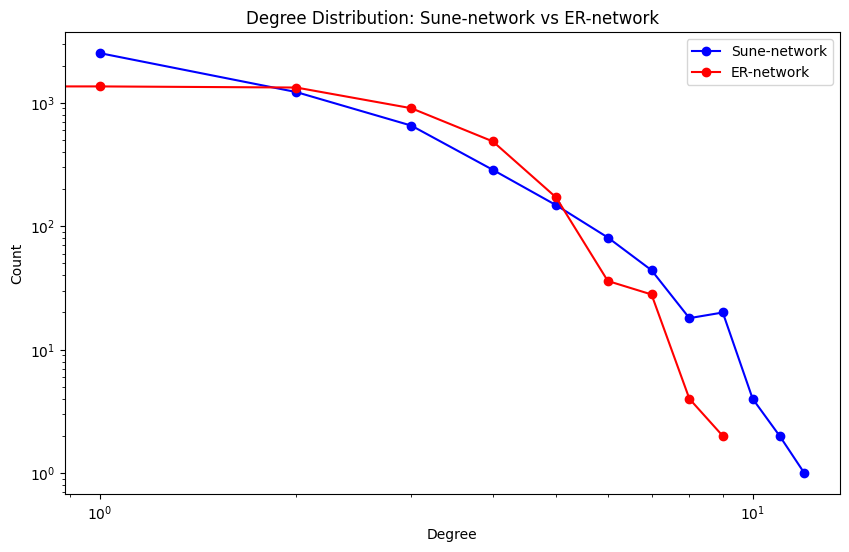

Number of connected components in Sune-network: 1
Number of connected components in ER-network: 827


In [13]:
# Generate the Sune-network
def grow_sune_network(num_nodes):
    G = nx.Graph()
    
    # Start with a single edge between two nodes
    G.add_edge(0, 1)

    # Add nodes one by one
    for new_node in range(2, num_nodes):
        existing_nodes = list(G.nodes)
        # Connect the new node to a random existing node (equal probability)
        connected_node = random.choice(existing_nodes)
        G.add_edge(new_node, connected_node)
    
    return G

# Generate the Sune-network with 5000 nodes
sune_network = grow_sune_network(5000)

# Generate an ER network with the same number of nodes and edges as the Sune-network
num_edges_sune = sune_network.number_of_edges()

# Calculate the edge probability for the ER graph based on the number of edges
num_nodes = 5000
p = 2 * num_edges_sune / (num_nodes * (num_nodes - 1))

# Generate the ER network
er_network = nx.erdos_renyi_graph(num_nodes, p)

# Plot and compare the degree distributions
def plot_degree_distribution(G, label, color):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    degree_count = np.bincount(degree_sequence)
    degrees = np.nonzero(degree_count)[0]
    plt.plot(degrees, degree_count[degrees], 'o-', label=label, color=color)

plt.figure(figsize=(10, 6))
plot_degree_distribution(sune_network, 'Sune-network', 'blue')
plot_degree_distribution(er_network, 'ER-network', 'red')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree Distribution: Sune-network vs ER-network')
plt.legend()
plt.show()

# Compare the number of connected components
num_components_sune = nx.number_connected_components(sune_network)
num_components_er = nx.number_connected_components(er_network)

print(f"Number of connected components in Sune-network: {num_components_sune}")
print(f"Number of connected components in ER-network: {num_components_er}")

* **Degree Distribution**

    * The Sune-network will have a broader degree distribution, with some nodes having significantly more connections than others but not as extreme as the Barabási-Albert model.

    * The ER-network typically has a more concentrated degree distribution (closer to a Poisson distribution), where most nodes have degrees near the average, and very few nodes deviate significantly from it.

* **Connected Components**

    * The Sune-network is likely to form a single connected component since each new node attaches to an existing one, ensuring connectivity.

    * The ER-network might have more than one connected component if the edge probability is not high enough, but generally, with enough edges, the largest connected component can encompass most nodes.
    
By comparing the degree distribution and the number of connected components, you can better understand how structural properties like randomness and attachment rules impact the overall topology of the network.